# Sentiment Analysis on Swiss Reader Feedback

This notebook demonstrates a workflow for performing sentiment analysis on a dataset of customer feedback using Python's NLP libraries.

## Steps:
1. Load the dataset
2. Preprocess the text
3. Vectorize the text data
4. Train a model
5. Evaluate the model
6. Visualize the results

## Step 1: Importing Libraries

```python

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords if not already present
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Step 2: Loading the Dataset

In [3]:
# Load the dataset
df = pd.read_csv('/workspaces/swiss-data-science-demos-/nlp_services/data/reader_feedback.csv')
df.head()

,feedback_id,customer_id,feedback_text,timestamp,source,sentiment_label
0,1,9120,"Everything was perfect, will use again.",2023-08-25 16:47:41,web,positive
1,2,6635,"Not too bad, but could be better.",2024-03-26 14:01:58,web,neutral
2,3,3257,"Fast and reliable, well done!",2024-09-06 21:51:13,mobile,positive
3,4,5520,"Service was fine, but not impressive.",2023-09-11 07:49:57,mobile,neutral
4,5,5655,The product was defective upon arrival.,2023-05-31 14:18:13,mobile,negative


# Step 3: Text Preprocessing

Text preprocessing is crucial for cleaning the data. We will convert text to lowercase and remove stopwords.

# Preprocessing function

In [4]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)


# Apply preprocessing

In [5]:
df['cleaned_feedback_text'] = df['feedback_text'].apply(preprocess_text)
df.head()

,feedback_id,customer_id,feedback_text,timestamp,source,sentiment_label,cleaned_feedback_text
0,1,9120,"Everything was perfect, will use again.",2023-08-25 16:47:41,web,positive,"everything perfect, use again."
1,2,6635,"Not too bad, but could be better.",2024-03-26 14:01:58,web,neutral,"bad, could better."
2,3,3257,"Fast and reliable, well done!",2024-09-06 21:51:13,mobile,positive,"fast reliable, well done!"
3,4,5520,"Service was fine, but not impressive.",2023-09-11 07:49:57,mobile,neutral,"service fine, impressive."
4,5,5655,The product was defective upon arrival.,2023-05-31 14:18:13,mobile,negative,product defective upon arrival.


# Step 4: Vectorizing the Text Data

We will convert the cleaned text into numerical data using Count Vectorization.

# Vectorization

In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_feedback_text'])

# Labels

In [8]:
y = df['sentiment_label']

# Step 5: Splitting the Data

We will split the data into training and testing sets.

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Training the Model

We will use a Naive Bayes classifier to train the model.

In [10]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

# Step 7: Making Predictions

We will make predictions on the test set.

In [11]:
# Make predictions
y_pred = model.predict(X_test)


# Step 8: Evaluating the Model

We will evaluate the model's performance.

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       219
     neutral       1.00      1.00      1.00       237
    positive       1.00      1.00      1.00       244

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



# Step 9: Visualizing the Results

Distribution of Sentiment Labels

/tmp/ipykernel_12425/2019267687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='Set2')  # Using 'Set2' palette for distinct colors


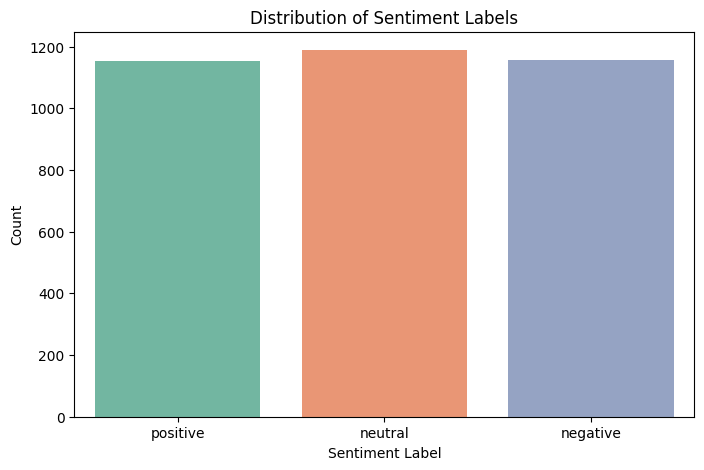

In [14]:
# Bar plot of sentiment distribution with different colors
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df, palette='Set2')  # Using 'Set2' palette for distinct colors
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


# Proportion of Each Sentiment Class

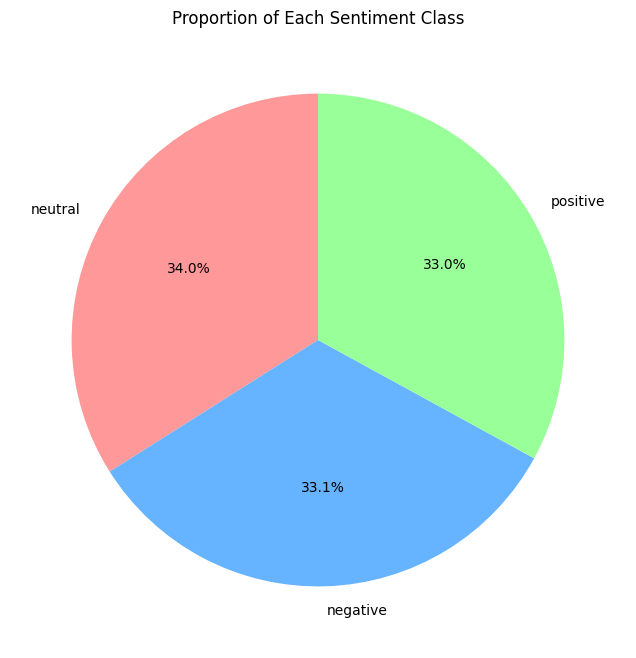

In [15]:
# Pie chart of sentiment distribution with custom colors
plt.figure(figsize=(8, 8))
colors = ['#ff9999','#66b3ff','#99ff99']  # Custom colors for each class
df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Each Sentiment Class')
plt.ylabel('')
plt.show()


# Confusion Matrix

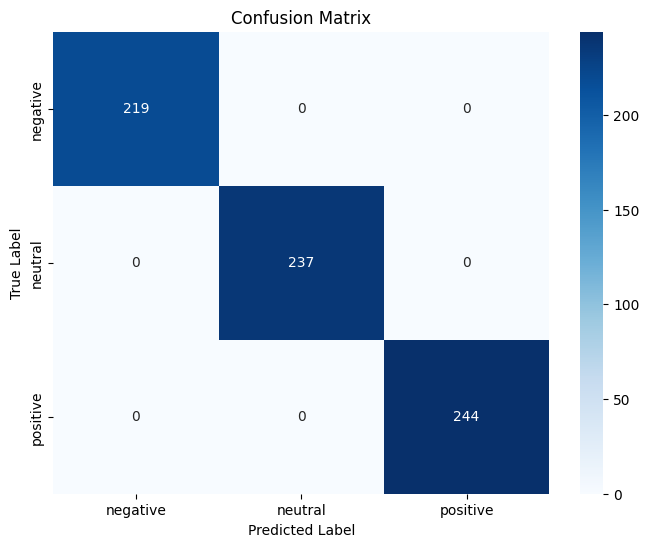

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Precision-Recall Curve

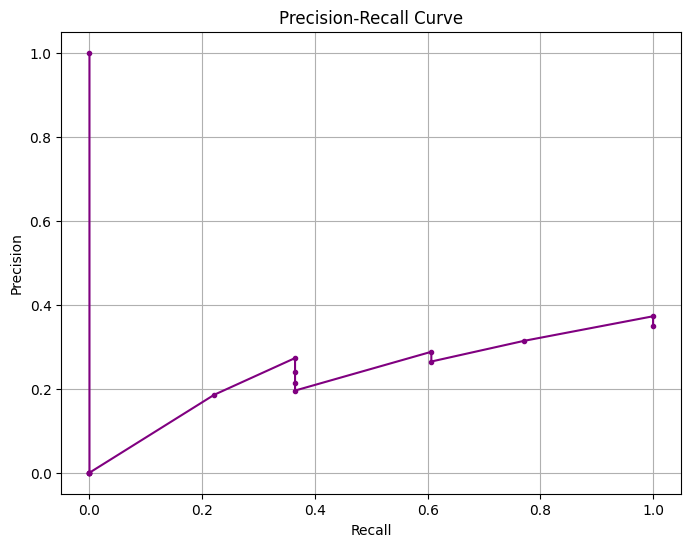

In [17]:
# Precision-Recall Curve
y_scores = model.predict_proba(X_test)[:, 1]  # scores for positive class
precision, recall, _ = precision_recall_curve(y_test, y_scores, pos_label='positive')

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='purple')  # Using a distinct color for the curve
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()



### Summary of Changes

1. **Bar Plot**: Used the `Set2` color palette from Seaborn for a pleasant distribution of sentiment labels.
2. **Pie Chart**: Defined custom colors (`#ff9999`, `#66b3ff`, `#99ff99`) for each sentiment class to enhance visual distinction.
3. **Precision-Recall Curve**: Changed the curve color to purple for better visibility against the background.

### Instructions to Use This Markdown

1. **Create or Update the Jupyter Notebook**:
   - Open Jupyter Notebook and create a new notebook or update your existing one.

2. **Add Markdown and Code Cells**:
   - Copy and paste the provided content into your notebook, creating the necessary Markdown and code cells.

3. **Run the Notebook**:
   - Execute each cell in the correct order to run the analysis and visualizations.

With these changes, your visualizations should be more colorful and engaging. If you have any more requests or need further modifications, feel free to ask!
